To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/install.html) and execute: `ploomber examples -n guides/first-pipeline`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/first-pipeline%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/first-pipeline%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)



# Your first Python pipeline

<!-- start description -->
Introductory tutorial to learn the basics of Ploomber.
<!-- end description -->

## Introduction

Ploomber helps you build modular pipelines. A pipeline (or **DAG**) is a group of tasks with a particular execution order, where subsequent (or **downstream** tasks) use previous (or **upstream**) tasks as inputs.

## Pipeline declaration

This example pipeline contains five tasks, `1-get.py`, `2-profile-raw.py`, 
`3-clean.py`, `4-profile-clean.py` and `5-plot.py`; we declare them in a `pipeline.yaml` file:

```yaml
# Content of pipeline.yaml
tasks:
   # source is the code you want to execute (.ipynb also supported)
  - source: 1-get.py
    # products are task's outputs
    product:
      # scripts generate executed notebooks as outputs
      nb: output/1-get.ipynb
      # you can define as many outputs as you want
      data: output/raw_data.csv

  - source: 2-profile-raw.py
    product: output/2-profile-raw.ipynb

  - source: 3-clean.py
    product:
      nb: output/3-clean.ipynb
      data: output/clean_data.parquet

  - source: 4-profile-clean.py
    product: output/4-profile-clean.ipynb

  - source: 5-plot.py
    product: output/5-plot.ipynb

```

**Note:** YAML is a human-readable text format similar to JSON.

**Note:** Ploomber supports Python scripts, Python functions, Jupyter notebooks, R scripts, and SQL scripts.

## Opening `.py` files as notebooks

Ploomber integrates with Jupyter. Among other things, it **allows you to open `.py` files as notebooks** (via `jupytext`).

![lab-open-with-nb](https://ploomber.io/images/doc/lab-open-with-notebook.png)

### What sets the execution order?

Ploomber infers the pipeline structure from your code. For example, to
clean the data, we must get it first; hence, we declare the following in `3-clean.py`:

~~~python
# 3-clean.py

# this tells Ploomber to execute the '1-get' task before '3-clean'
upstream = ['1-get']
~~~

## Plotting the pipeline

In [1]:
%%bash
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


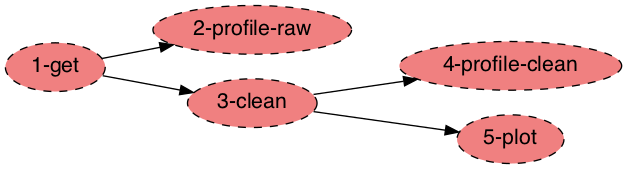

In [2]:
from IPython.display import Image
Image(filename='pipeline.png')

You can see that our pipeline has a defined execution order.

**Note:** This is a sample predefined five-task pipeline, Ploomber can manage arbitrarily complex pipelines and dependencies among tasks.

## Running the pipeline

In [3]:
%%bash
# takes a few seconds to finish
ploomber build

Loading pipeline...
name             Ran?      Elapsed (s)    Percentage
---------------  ------  -------------  ------------
1-get            True          2.68205       13.9314
2-profile-raw    True          4.57552       23.7666
3-clean          True          2.53486       13.1668
4-profile-clean  True          3.8043        19.7607
5-plot           True          5.65512       29.3745


Building task '5-plot': 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]


This pipeline saves all the output in the `output/` directory; we have the output notebooks and data files:

In [4]:
%%bash
ls output

1-get.ipynb
2-profile-raw.ipynb
3-clean.ipynb
4-profile-clean.ipynb
5-plot.ipynb
clean_data.parquet
raw_data.csv


## Updating the pipeline

Ploomber automatically caches your pipeline’s previous results and only runs tasks that changed since your last execution.

Execute the following to modify the `3-clean.py` script

In [5]:
from pathlib import Path

path = Path('3-clean.py')
clean = path.read_text()

# add a print statement at the end of 3-clean.py
path.write_text(clean + """
print("hello")
""")

417

Execute the pipeline again:

In [6]:
%%bash
# takes a few seconds to finish
ploomber build

Loading pipeline...
name             Ran?      Elapsed (s)    Percentage
---------------  ------  -------------  ------------
3-clean          True          2.35839       20.2362
4-profile-clean  True          3.73398       32.0396
5-plot           True          5.56192       47.7242
1-get            False         0              0
2-profile-raw    False         0              0


Building task '5-plot': 100%|██████████| 3/3 [00:11<00:00,  3.89s/it]


In [7]:
# restore contents
path.write_text(clean)

401

You'll see that `1-get.py` & `2-profile-raw.py` didn't run because it was not affected by the change!

## Where to go from here

**Bring your own code!** Check out the tutorial to [migrate your code to Ploomber](https://docs.ploomber.io/en/latest/user-guide/refactoring.html).

Have questions? [Ask us anything on Slack](https://ploomber.io/community/).

Want to dig deeper into Ploomber's core concepts? Check out [the basic concepts tutorial](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).

Want to start a new project quickly? Check out [how to get examples](https://docs.ploomber.io/en/latest/user-guide/templates.html).

